## Zbi√≥r danych MNIST
Zbi√≥r danych MNIST sk≈Çada siƒô z 70 000 ma≈Çych rysunk√≥w zawierajƒÖcych cyfry odrƒôcznie zapisane przez uczni√≥w szk√≥≈Ç ≈õrednich i pracownik√≥w ameryka≈Ñskiego Biura Spisu Ludno≈õci. Ka≈ºdy rysunek zawiera etykietƒô okre≈õlajƒÖcƒÖ zawartƒÖ na nim cyfrƒô.

Zestaw danych MNIST pobieramy za pomocƒÖ modu≈Çu Scikit-Learn:

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Zazwyczaj zbiory danych wczytywane przez modu≈Ç Scikit-Learn majƒÖ podobne strukturƒô sk≈ÇadajƒÖcƒÖ siƒô z nastƒôpujƒÖcych element√≥w:
- klucza `DESCR` opisujƒÖcego zbi√≥r danych,
- klucza `data` zawierajƒÖcego tablicƒô, w kt√≥rej ka≈ºdy wiersz reprezentuje przyk≈Çad, a kolumna ‚Äì cechƒô,
- klucza `target` przechowujƒÖcego tablicƒô etykiet.

Sp√≥jrzmy na tablicƒô:

In [2]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
28 * 28

784

W tym zbiorze danych wystƒôpuje 70 000 obraz√≥w, a ka≈ºdy z nich jest opisany 784 cechami. Ka≈ºdy obraz ma rozmiar 28x28 pikseli i ka≈ºda cecha opisuje natƒô≈ºenie szaro≈õci danego piksela i przyjmuje warto≈õci od 0 (kolor bia≈Çy) do 255 (kolor czarny). Aby sprawdziƒá jak wyglƒÖda przyk≈Çadowa cyfra przechowywana w zestawie danych, wystarczy w tym celu wybraƒá wektor cech danej  pr√≥bki i przekszta≈Çciƒá go w macierz o rozmiarze 28x28, a nastƒôpnie wy≈õwietliƒá go za pomocƒÖ funckji `imshow()` w module Matplotlib:

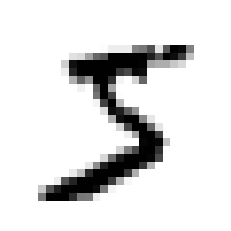

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

Obrazek ten przypomina liczbƒô "5". Gdy spr√≥bujemy wywo≈Çaƒá etykietƒô, faktycznie tak jest:

In [6]:
y[0]

'5'

Etykieta jest ≈Ça≈Ñcuchem znak√≥w. Wiƒôkszo≈õƒá algorytm√≥w uczenia maszynowego spodziewa siƒô warto≈õci numerycznych, dlatego przekszta≈Çƒámy `y` w liczbƒô ca≈ÇkowitƒÖ:

In [7]:
import numpy as np
y = y.astype(np.uint8)

In [8]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [9]:
# BONUS
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

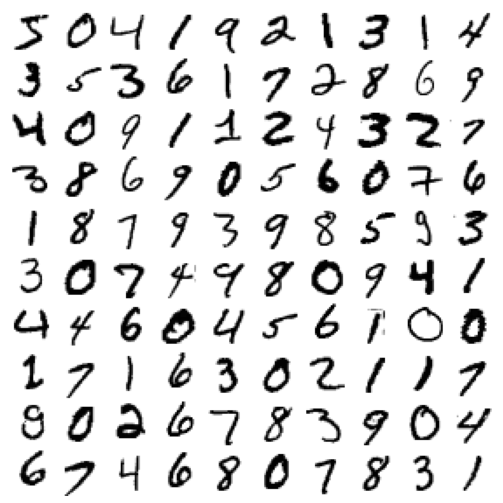

In [10]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

Przed dok≈Çadniejszym przyjrzeniem siƒô danych powinni≈õmy zawsze najpierw stworzyƒá zbi√≥r testowy i odstawiƒá go na bok. Zestaw MNIST jest ju≈º podzielony na zbiory uczƒÖcy (piersze 60 000 przyk≈Çad√≥w) i testowy (pozosta≈Çe 10 000 obraz√≥w):

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Zestaw danych uczƒÖcych zosta≈Ç ju≈º za nas przetasowany, co jest dobry rozwiƒÖzaniem, gdy≈º gwarantuje, ≈ºe podzbiory utworzone podczas sprawdzianu krzy≈ºowego bƒôdƒÖ do siebie podobne (nie chcemy, aby w kt√≥rym≈õ podzbiorze zabrak≈Ço jakiej≈õ cyfry). Ponadto niekt√≥re algorytmy sƒÖ wra≈ºliwe na kolejno≈õƒá pr√≥bek uczƒÖcych i nie za dobrze sobie z tym radzƒÖ, je≈ºeli przetwarzajƒÖ wiele podobnych przyk≈Çad√≥w z rzƒôdu. Unikamy ten problem przy przetasowaniu zbioru danych (**ALE** to nie jest uniwersalne rozwiƒÖzanie, nie dzia≈Ça to dobrze z danymi szeregu czasowego [**gie≈Çda**]).

## Uczenie klasyfikatora binarnego
Upro≈õƒámy na razie problem i spr√≥bujmy identyfikowaƒá tylko jednƒÖ cyfrƒô np. 5. Ten "wykrywacz piƒÖtek" bƒôdzie stanowi≈Ç przyk≈Çad **klasyfikatora binarnego** (*binary classifier*), zdolnego do rozpoznawania jedynie dw√≥ch klas: **piƒÖtek** i **niepiƒÖtek**. Stw√≥rzmy wektory docelowe dla tego zadania klasyfikujƒÖcego:

In [12]:
y_train_5 = (y_train == 5) # Warto≈õƒá True dla piƒÖtek, False dla wszystkich pozosta≈Çych cyfr
y_test_5 = (y_test == 5)

Teraz wybierzmy i wytrenujmy jaki≈õ klasyfikator. Warto rozpoczƒÖƒá od klasyfikatora **stochastycznego spadku wzd≈Çu≈º gradientu** (*Stochastic Gradient Descent* ‚Äì SGD) ‚Äì pos≈Çu≈ºy nam do tego klasa `SGDClassifier`. Algorytmy ten cechuje siƒô mo≈ºliwo≈õciƒÖ wydajnego przetwarzania bardzo du≈ºych zestaw√≥w danych, gdy≈º klasyfikator SGD przetwarza poszczeg√≥lne przyk≈Çady uczƒÖce niezale≈ºnie od siebie, po jednym naraz (z tego powodu nadaje siƒô on r√≥wnie≈º do **uczenia przyrostowego**)

Stw√≥rzmy klasyfikator `SGDClassifier` i wytrenujmy go wobec ca≈Çego zbiory uczƒÖcego:

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

üü¢üü¢ Skuteczno≈õƒá klasyfikatora `SGDClassifier` zale≈ºy od losowo≈õci na etapie uczenia (stƒÖd przymiotnik *stochastyczny*). Je≈õli chcesz, aby wyniki by≈Çy powtarzalne, wyznacz warto≈õƒá parametru `random_state`. üü¢üü¢

Mo≈ºemy teraz pos≈Çu≈ºyƒá siƒô tym algorytmem do wykrywania cyfry "5" w zbiorze danych:

In [14]:
sgd_clf.predict([some_digit])

array([ True])

Klasyfikator zgaduje, ze na wyznaczonym obrazie znajduje siƒô cyfra 5 (warto≈õƒá `True`). WyglƒÖda na to, ≈ºe siƒô nie pomyli≈Ç w tym konkretnym przypadku!

Teraz nale≈ºy oceniƒá wydajno≈õƒá tego modelu

## Miary wydajno≈õci


Czƒôsto ocena klasyfikatora stanowi wiƒôksze wyzwanie od ewaluacji regresoa, daltego po≈õwiƒôcimy temu zagadanieniu du≈ºƒÖ czƒô≈õƒá niniejszego rozdzia≈Çu. Istnieje wiele miar wydajno≈õci, przed nami kolejna dawka nowych pojƒôƒá i skok√≥w!

### Pomiar dok≈Çadno≈õci za pomocƒÖ sprawdzianu krzy≈ºowego
Zastosowanie metody sprawdzianu krzy≈ºowego jest dobrym sposobem oceny modelu.

Wykorzystujemy funkcjƒô `cross_val_score()` do oceny naszego modelu `SDGClassifier` za pomocƒÖ metody sprawdzianu krzy≈ºowego; wygenerujemy trzy podzbiory.

Przypominam: **kroswalidacja k-ktorna** oznacza rozdzielenie zestawu uczƒÖcego na k podzbior√≥w (w tym przypadku k=3), nastƒôpnie wyuczenie modelu k-1 podzbiorach, a na ko≈Ñcu przeprowadzenie prognoz i ich ocena wobec ostatniego podzbioru, a wszystko powt√≥rzone k razy, tak ≈ºe zostajƒÖ wykorzystane wszystkie podzbiory:

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

Sukces! **Dok≈Çadno≈õƒá** powy≈ºej 85% (wsp√≥≈Çczynnik prawid≈Çowych prognoz) wobec wszystkich podzbior√≥w sprawdzianu krzy≈ºowego üò±‚ùóÔ∏è

Przyjrzyjmy siƒô bardzo prostemy klasyfikatorowi klasyfikujƒÖcemy jedynie obrazy niebƒôdƒÖce piƒÖtkami:

### Implementacja sprawdzianu krzy≈ºowego
Czasem bedziemy potrzebowaƒá wiƒôkszej kontroli nad metodƒÖ kroswalidacji, ni≈º zapewnia nam domy≈õlnie modu≈Ç Scikit-Learn. W takim przypadku mo≈ºemy samodzielnie zaimplementowaƒá sprawdzian krzy≈ºowy. Poni≈ºszy kod wykonume mniej wiƒôcej te same operacje, co funkcja `cross_val_score()` i wy≈õwietla te wyniki:

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # Wy≈õwietla wyniki

/Users/maurycyczajka/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.95035
0.96035
0.9604


Klasa `StratifiedKFold` przeprowadza losowanie warstwowe, dziƒôki kt√≥remu otrzymujemy podzbiory zawierajƒÖce reprezentacje populacji ka≈ºdej z klas. W ka≈ºdym przebiegu kod tworzy klon klasyfikatora, trenuje go za pomocƒÖ podzbior√≥w uczƒÖcych i ocenia zdolno≈õci prognostycznƒÖ na podzbiorze testowym. Nastƒôpnie jest zliczana liczba prawid≈Çowych prognoz i zostaje wy≈õwietlony wsp√≥≈Çczynnik prawid≈Çowych prognoz.

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

Sprawd≈∫my, jak bƒôdzie wyglƒÖdaƒá dok≈Çadno≈õƒá modelu:

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

**Dok≈Çadno≈õƒá rzƒôdu 90%!!** Wynika to jednak z faktu, ≈ºe tylko oko≈Ço 10% wszystkich obraz√≥w stanowiƒÖ piatki, dlatego gdyby≈õmy zawsze zgadywali, ≈ºe dany obraz nie jest piƒÖtkƒÖ, to mieliby≈õmy racjƒô w ok. 90% przypadk√≥w.

Teraz ju≈º wiemy, dlaczego generalnie dok≈Çadno≈õƒá nie stanowi dobrej miary wydajno≈õci klasyfikator√≥w, zw≈Çaszcza w przypadku **wypaczonych zbior√≥w danych** (*skewed datasets*, sƒÖ to takie zbiory danych, w kt√≥rych niekt√≥re klasy wystƒôpujƒÖ znacznie czƒô≈õciej od pozosta≈Çych).

### Macierz pomy≈Çek
Znacznie lepszym sposobem oceny wydajno≈õci klasyfikatora jest analiza **macierzy pomy≈Çek** (*confusion matrix*). Koncepcja polega na zliczaniu przypadk√≥w zaklasyfikowania pr√≥bek z klasy A jako przyk≈Çad√≥w nale≈ºƒÖcych do klasy B. Przyk≈Çadowo, aby dowiedzieƒá siƒô ile razy algorytm pomyli≈Ç obrazy piƒÖtek z obrazami tr√≥jek, wystarczy spojrzeƒá na piƒÖty rzƒÖd i trzeciƒÖ kolumnƒô macierzy pomy≈Çek.

W celu obliczenia macierzy pomy≈Çek musimy najpierw uzyskaƒá zbi√≥r prognoz, kt√≥re por√≥wnamy z rzeczywistymi warto≈õciami docelowymi. Mogliby≈õmy prognozowaƒá wyniki dla zbioru testowego, jednak na razie nie bƒôdziemy go ruszaƒá (pamiƒôtaj, ≈ºe chcemy wykorzystaƒá zestaw testowy jedynie na samym ko≈Ñcu projektu, gdy nasz klasyfikator bƒôdzie ju≈º gotowy do pracy). Zamiast tego skorzystamy z funkcji `cross_val_predict()`:

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

Funkcje `cross_val_score()` i `corss_val_predict()`, przeprowadzajƒÖ k-krotny sprawdzian krzy≈ºowy, jednak ta druga nie zwraca wynik√≥w ewaluacji, lecz prognozy uzyskane dla ka≈ºdego podzbioru testowego. Oznacza to, ≈ºe mozemy otrzymaƒá 'czystƒÖ' progno≈ºe dla ka≈ºdej pr√≥bki stanowiƒÖcej czƒô≈õƒá zbioru uczƒÖcego ("czysta" oznacza w tym kontek≈õcie, ≈ºe prognoza zosta≈Ça uzyskana przez model, kt√≥ry wcze≈õniej nie widzia≈Ç tego przyk≈Çadu na etapie uczenia).

Teraz mo≈ºemy uzyskaƒá macierz pomy≈Çek za pomocƒÖ funkcji `confusion_matrix()`. Wystarczy podaƒá klasy docelowe `(y_train_5)` i przewidywane klasy `(y_train_pred)`:

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53115,  1464],
       [  916,  4505]])

Macierz pomy≈Çek wskazuje wiele informacji, jednak≈ºe czasem potrzebny jest bardziej zwiƒôz≈Çy wska≈∫nik. Takim jest dok≈Çadno≈õƒá pozytywnych prognoz ‚Äì jest to tak zwana **precyzja klasyfikatora**.

**R√≥wnanie 3.1.** *Precyzja*
### $$ Precyzja = \frac{PP}{PP + FP} $$

Najbardziej banalnym sposobem uzyskania doskona≈Çej precyzji kest otrzymanie pojedynczej pozytywnej prognozy i upewnienie siƒô, ≈ºe jest prawid≈Çowa (Precyzja = 1/1 = 100%). Nie by≈Çoby to jednak przydatne, bo klasyfikator ignorowa≈Çby wszystkie pr√≥bki opr√≥cz jednej pozytywnej. Precyzjƒô nale≈ºy u≈ºywaƒá wraz z innym wska≈∫nikiem, zwanym **pe≈Çno≈õciƒÖ**, **czu≈Ço≈õciƒÖ** lub **odsetkiem prawdziwie pozytywnych** (OPP): jest to odsetek pozytywnych przyk≈Çad√≥w, kt√≥re zosta≈Çy prawid≈Çowo rozpoznane przez klasyfikator.

**R√≥wnanie 3.2.** *Pe≈Çno≈õƒá*
### $$ Pe≈Çno≈õƒá = \frac{PP}{PP + FN} $$
***

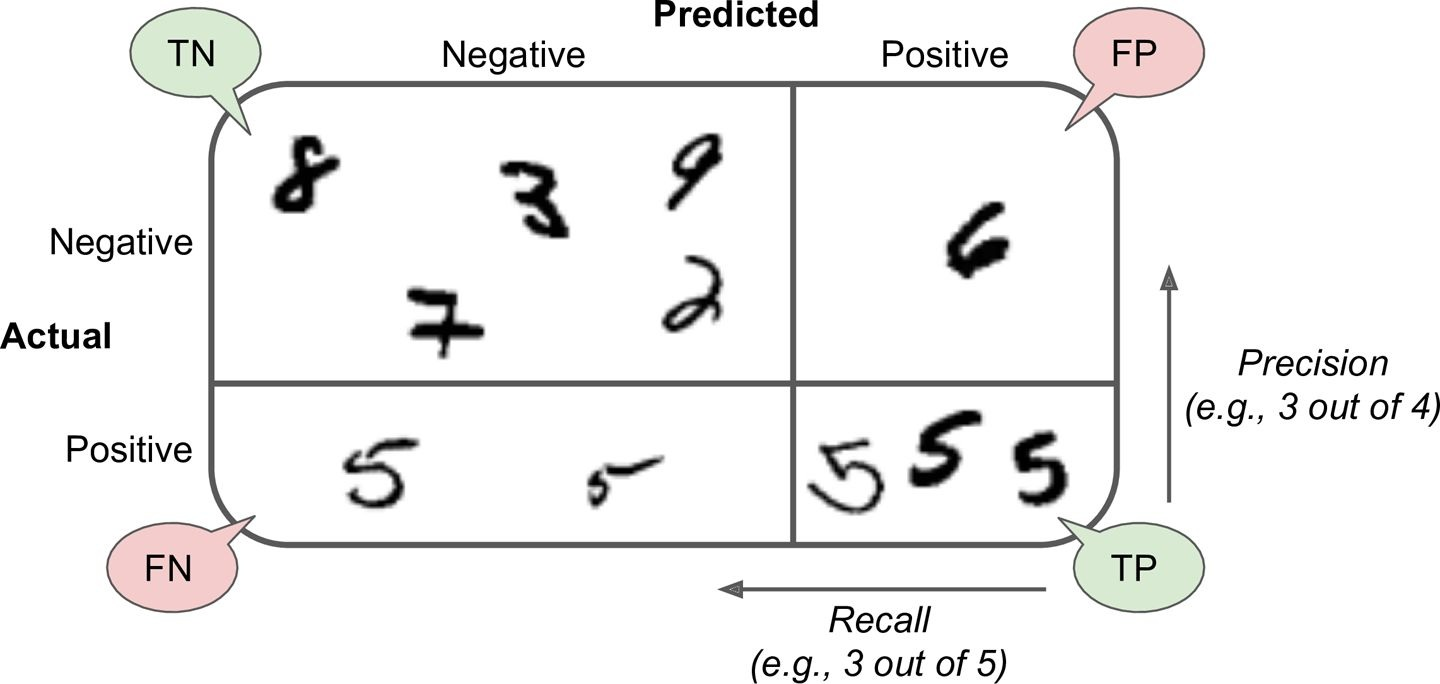

**Rysunek 3.2** *Schemat macierzy pomy≈Çek ukazujƒÖcy przyk≈Çady prawdziwie negatywne (lewy g√≥rny r√≥g), fa≈Çszywie pozytywne (prawy g√≥rny r√≥g), fa≈Çszywie negatywne (lewy dolny r√≥g) i prawdziwie pozytywne (prawy dolny r√≥g).*

### Precyzja i pe≈Çno≈õƒá
Modu≈Ç Scikit-Learn zawiera kilka funkcji obliczajƒÖcych wska≈∫niki klasyfikator√≥w, w tym r√≥wnie≈º precyzjƒô i pe≈Çno≈õƒá:

In [21]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7547327860613168

In [22]:
recall_score(y_train_5, y_train_pred)

0.8310274857037447

Wykrywacz piƒÖtek nie jest ju≈º tak imponujƒÖcy jak na etapie sprawdzania jego dok≈Çadno≈õci. Gdy uznaje, ≈ºe rozpoznaje "5", nie myli siƒô jedynie w 75% przypadk√≥w, a do tego rozpoznaje jedynie 83% piƒÖtek.

Aby po≈ÇƒÖczyƒá precyzjƒô i pe≈Çno≈õƒá oraz por√≥wnaƒá dwa klasyfikatory, mo≈ºna u≈ºyƒá **wynik $F_{1}$** ‚Äì stanowi on **≈õredniƒÖ harmonicznƒÖ** precyzji i pe≈Çno≈õci. Standardowa ≈õrednia traktuje wszystkie warto≈õci jednakowo, natomiast ≈õrednia harmoniczna nadaje wiƒôkszƒÖ wagƒô ma≈Çym warto≈õciom. W rezultacie klasyfikator uzyska du≈ºƒÖ warto≈õƒá wyniku $F_{1}$ jedynie wtedy, gdy zar√≥wno precyzja, jak i pe≈Çno≈õƒá bƒôdƒÖ mia≈Çy du≈ºƒÖ warto≈õƒá.

**R√≥wnanie 3.3.** *Wynik $F_{1}$*
$$
F_1 = \cfrac{2}{\cfrac{1}{\text{precyzja}} + \cfrac{1}{\text{pe≈Çno≈õƒá}}} = 2 \times \cfrac{\text{precyzja}\, \times \, \text{pe≈Çno≈õƒá}}{\text{precyzja}\, + \, \text{pe≈Çno≈õƒá}} = \cfrac{PP}{PP + \cfrac{FN + FP}{2}}
$$

Aby obliczyƒá $F_{1}$, wystarczy wywo≈Çaƒá funkcjƒô `f1_score()`:

In [23]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.791044776119403

Wynik $F_{1}$ faworyzuje klasyfikatory majƒÖce zbli≈ºone warto≈õci precyzji i pe≈Çno≈õci, ale nie zawsze tego chcemy: czasem zale≈ºy nam na precyzji, czasem na pe≈Çno≈õci. Przyk≈Çadowo, po wyuczeniu klasyfikatora w okre≈õlaniu film√≥w bezpiecznych dla dzieci, prawdopodobnie du≈ºo dobrych film√≥w zosta≈Çoby odrzuconych (ma≈Ça warto≈õƒá pe≈Çno≈õci), ale zapamiƒôtujƒÖcy jedynie bezpieczne (du≈ºa precyzja). Niekorzystna by≈Çaby sytuacja, w kt√≥rej model cechuje siƒô znacznie wiƒôkszƒÖ pe≈Çno≈õciƒÖ, ale jednocze≈õnie dopuszcza kilka nieodpowiednich film√≥w (w takich przypadkach nale≈ºy dodaƒá element ludzki do potoku ‚Äì osobƒô sprawdzajƒÖcƒÖ wyniki klasyfikatora). Z drugiej strony, za≈Ç√≥≈ºmy, ≈ºe trenujemy klasyfikator rozpoznajƒÖcy z≈Çodzei z zapis√≥w kamer: nic siƒô z≈Çego nie stanie, je≈õli model bƒôdzie mia≈Ç tylko 30% precyzji przy 99% pe≈Çno≈õci (ochroniarz mo≈ºe wygenerowaƒá kilka fa≈Çszywych alarm√≥w, ale niemal wszyscy przestƒôpcy zostanƒÖ z≈Çapani).

Jednak≈ºe, wraz ze wzrotemm precyzji maleje pe≈Çno≈õƒá i odwrotnie. Zale≈ºno≈õƒá ta jest nazywana **kompromisem pomiƒôdzy precyzjƒÖ a pe≈Çno≈õciƒÖ**.

### Kompromis pomiƒôdzy precyzjƒÖ a pe≈Çno≈õciƒÖ
Nale≈ºy zrozumieƒá w jaki spos√≥b klasyfikator `SGDCClassifer` podejmuje decyzje:
- dla ka≈ºdej pr√≥bki zostaje wyliczony wynik na podstawie **funkcji decyzyjnej**
- je≈ºeli jego warto≈õƒá przekroczy okre≈õlony pr√≥g, przyk≈Çad ten zostnaie przydzielony do klasy pozytywnej, w przeciwnym wypadku bƒôdzie wyznaczony do klasy negatywnej

Na **Rysunku 3.3.** widzimy kilka cyfr umieszczonych w kolejno≈õci od najni≈ºszego do najwy≈ºszego wyniku. Za≈Ç√≥≈ºmy, ≈ºe **pr√≥g decyzyjny** znajduje siƒô w miejscu wskazywanym przez ≈õrodkowƒÖ strza≈Çkƒô (miƒôdzy dwiema "5"); w ten spos√≥b otrzymujemy po prawej stronie 4 pr√≥bki prawdziwie pozytywne (rzeczywiste piƒÖtki) i jednƒÖ fa≈Çszywie pozytywnƒÖ (cyfra 6). W√≥wczas, pr√≥g precyzji wynosi 80% (cztery z piƒôciu). Jednak na sze≈õƒá dostƒôpnych piƒÖtek zostajƒÖ rozpoznane tylko cztery, datego uzyskujemy tu pe≈Çno≈õƒá na poziomie 67%  (cztery z sze≈õciu). Je≈õli podniesiemy pr√≥g (przesuniemy go w prawo), przyk≈Çad fa≈Çszywie pozytywny (cyfra 6) stanie siƒô prawdziwie negatywny, dziƒôki czemu wzro≈õnie precyzja (do 100% w omawianym przyk≈Çadzie), ale z kolei jedna warto≈õƒá prawdziwie pozytywna przekszta≈Çci siƒô w fa≈Çszy- wie negatywnƒÖ, przez co warto≈õƒá pe≈Çno≈õci zmaleje do 50%. Z kolei obni≈ºenie progu (przesuniƒôcie go w lewo) zwiƒôkszy pe≈Çno≈õƒá przy jednoczesnej redukcji precyzji.

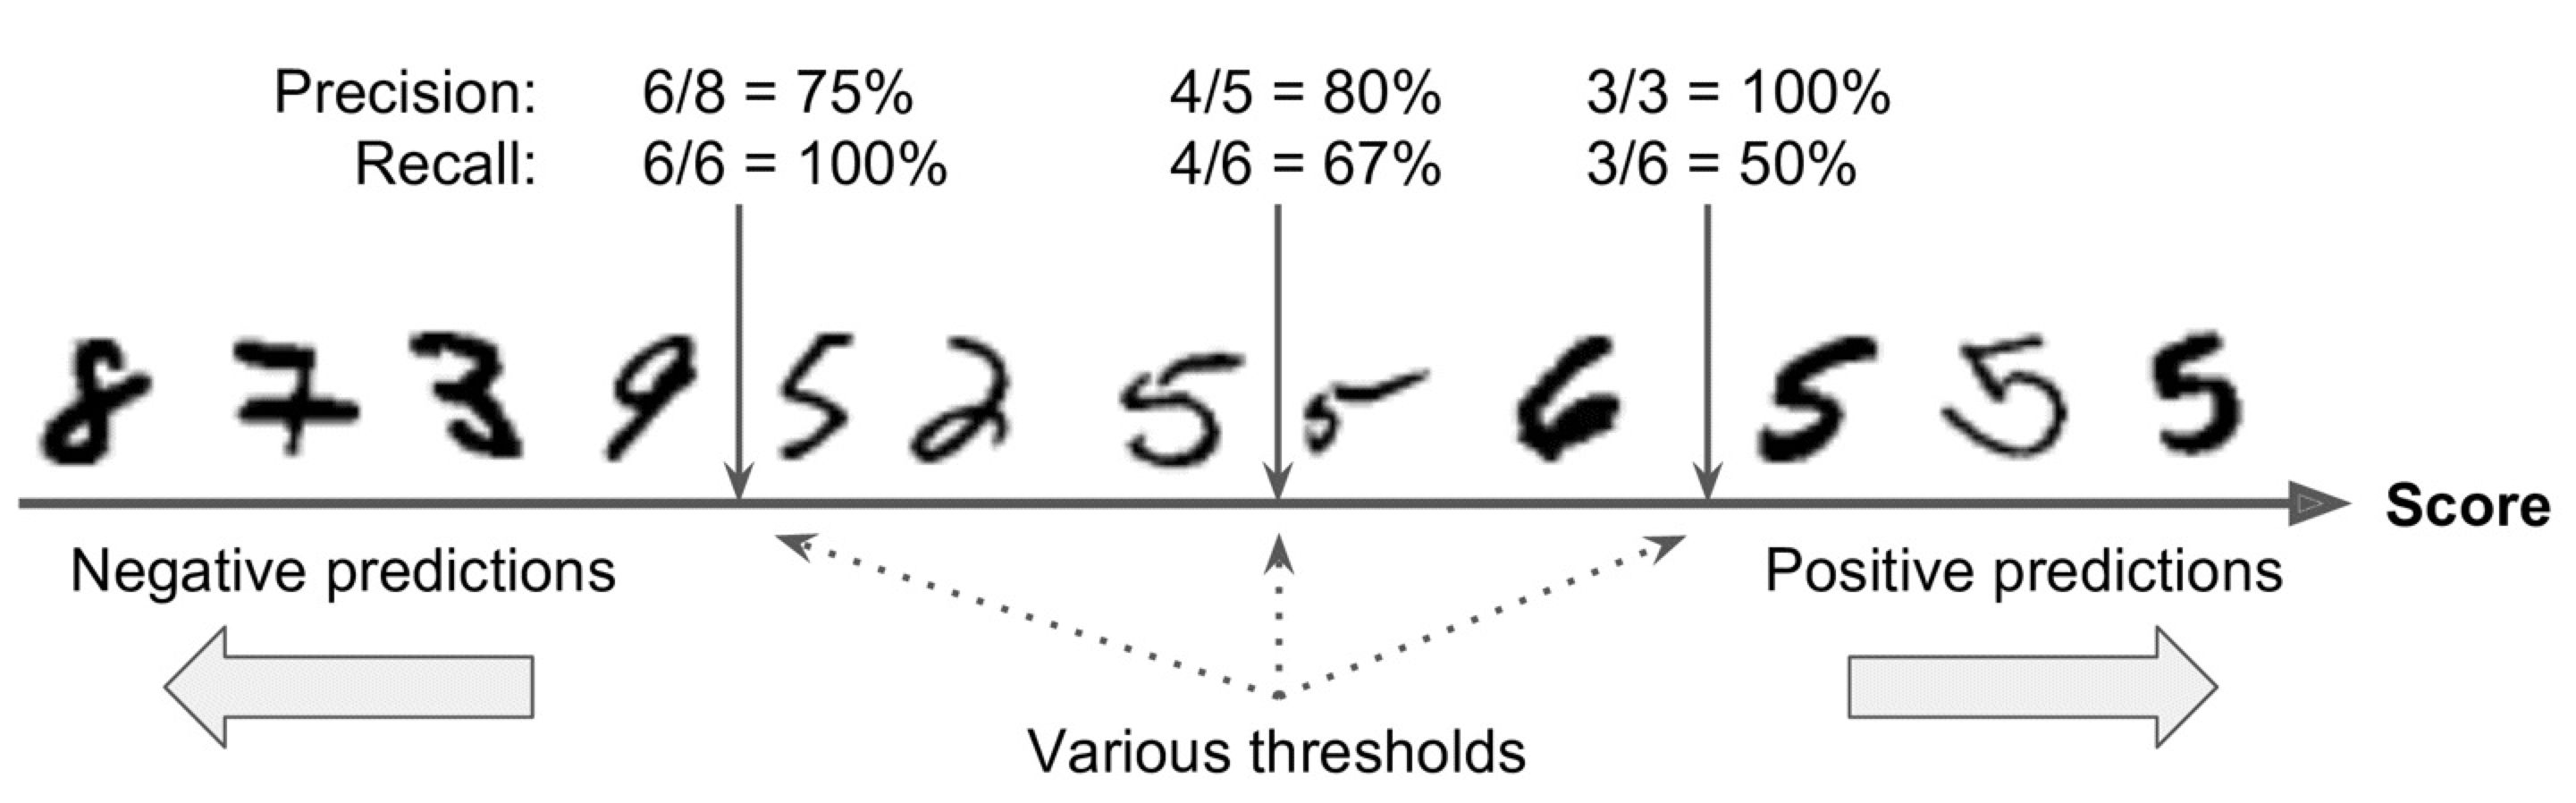

**Rysunek 3.3** *W powy≈ºszym kompromisie pomiƒôdzy precyzjƒÖ a pe≈Çno≈õciƒÖ obrazy sƒÖ oceniane zgodnie z wynikiem klasyfikatora, a te, kt√≥rych wynik przekroczy wyznaczony pr√≥g decyzyjny, zostajƒÖ uznane za pozytywne; im wy≈ºszy pr√≥g, tym mniejsza pe≈Çno≈õƒá, ale (zazwyczaj) wiƒôksza precyzja*

Modu≈Ç Scikit-Learn nie pozwala na bezpo≈õrednie dobieranie prog√≥w, ale daje nam dostƒôp do wynik√≥w decyzyjnych, za pomocƒÖ kt√≥rych sƒÖ wyliczane prognozy. Zamiast wywo≈Çywaƒá metodƒô `predict()`, mo≈ºemy skorzystaƒá z metody `decision_function()`, kt√≥ra zwraca obliczony wynik dla ka≈ºdej pr√≥bki, a nastƒôpnie wyliczyƒá prognozy na podstawie tych wynik√≥w przy u≈ºyciu dowolnego progu:

In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [25]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

Klasyfikator `SGDClassifier` korzysta z progu o warto≈õci 0, dlatego powy≈ºszy kod zwraca taki sam wynik, jak metoda `predict()` (np.`True`). Podnie≈õmy teraz ten pr√≥g:

In [26]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Uzyskali≈õmy w ten spos√≥b dow√≥d, ≈ºe podniesienie progu zmniejsza pe≈Çno≈õƒá. Analizowany obraz w rzeczywisto≈õci symbolizuje cyfrƒô 5 i klasyfikator rozpoznaje jƒÖ przy progu o warto≈õci 0, ale myli siƒô, gdy warto≈õƒá progu zostanie podniesiona do warto≈õci 8000.

W jaki spos√≥b nale≈ºy dobieraƒá pr√≥g? Najpierw skorzystaj z funkcji `cross_val_predict()`, aby uzyskaƒá wyniki wszystkich przyk≈Çad√≥w zestawu uczƒÖcego, tym razem jednak zaznacz, ≈ºe chcesz otrzymaƒá nie prognozy, lecz wyniki decyzyjne:

In [27]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

MajƒÖc te wyniki, mo≈ºesz wyliczyƒá precyzjƒô i pe≈Çno≈õƒá dla wszystkich mo≈ºliwych prog√≥w za pomocƒÖ funkcji `precision_recall_curve()`:

In [28]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Na koniec za pomocƒÖ modu≈Çu Matplotlib wygeneruj wykres precyzji i pe≈Çno≈õci w funkcji progu decyzyjnego (rysunek 3.4):

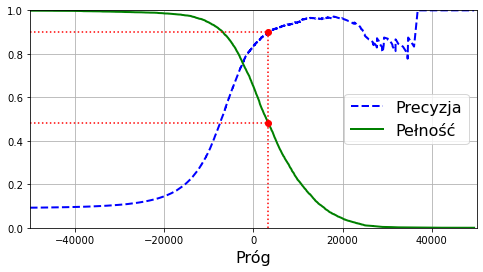

In [29]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precyzja", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Pe≈Çno≈õƒá", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Pr√≥g", fontsize=16)             
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
plt.show()

**Rysunek 3.4.** *Wykres precyzji i pe≈Çno≈õci w funkcji progu decyzyjnego*

üîµüîµ Pewnie zastanawiasz siƒô, dlaczego na rysunku 3.4 krzywa precyzji nie jest tak r√≥wna, jak krzywa pe≈Çno≈õci. Wynika to z faktu, ≈ºe precyzja mo≈ºe czasami maleƒá wraz z podnoszeniem warto≈õci progowej (chocia≈º zasadniczo jej warto≈õƒá r√≥wnie≈º wzrasta). Aby zrozumieƒá ten mechanizm, przyjrzyj siƒô ponownie rysunkowi 3.3; zobacz, co siƒô bƒôdzie dzia≈Ço, gdy zaczniesz od ≈õrodkowego progu i bƒôdziesz przesuwaƒá siƒô w prawo po jednej pozycji naraz: warto≈õƒá precyzji zmienia siƒô z 4/5 (80%) na 3/4 (75%). Z drugiej strony, wraz ze wzrostem warto≈õci progowej pe≈Çno≈õƒá mo≈ºe wy≈ÇƒÖcznie maleƒá, dlatego jej krzywa jest taka g≈Çadka.

Innym sposobem wyznaczenia dobrego kompromisu jest narysowanie wykresu precyzji bezpo≈õrednio w funkcji pe≈Çno≈õci, co zosta≈Ço zaprezentowane na rysunku 3.5 (wyznaczyli≈õmy tu ten sam pr√≥g co poprzednio).

Jak widaƒá, krzywa precyzji zaczyna stromo opadaƒá dopiero przy warto≈õci mniej wiƒôcej 80% pe≈Çno≈õci. Prawdopodobnie bƒôdziemy chcieli wybraƒá kompromis pomiƒôdzy precyzjƒÖ a pe≈Çno≈õciƒÖ wyznaczony tu≈º przed poczƒÖtkiem opadania krzywej ‚Äî mniej wiƒôcej przy 60% pe≈Çno≈õci. Oczywi≈õcie wyb√≥r odpowiedniego progu zale≈ºy od danego projektu.

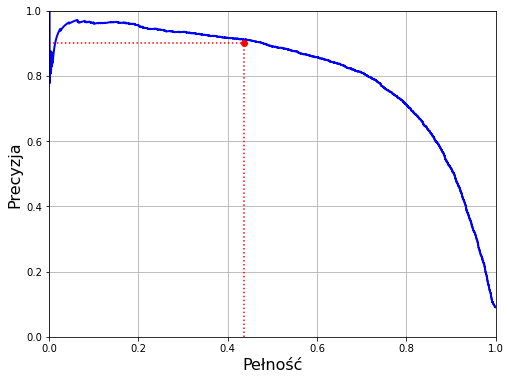

In [30]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Pe≈Çno≈õƒá", fontsize=16)
    plt.ylabel("Precyzja", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

**Rysunek 3.5.** *Wykres precyzji w funkcji pe≈Çno≈õci*

In [31]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] #~ 7816

In [32]:
threshold_90_precision

3370.0194991439557

In [33]:
y_train_pred_90 = (y_scores > threshold_90_precision)

In [34]:
precision_score(y_train_5, y_train_pred_90)

0.9

In [35]:
recall_score(y_train_5, y_train_pred_90)

0.47980077476480354

### Wykres krzywej ROC
Wykres krzywej **charakterystyki roboczej odbiornika** (ang. *receiver operating characteristic* ‚Äì ROC) stanowi kolejne popularne narzƒôdzie u≈ºywane wraz z klasyfikatorami binarnymi. Przypomina on w znacznym stopniu wykres precyzji w funkcji pe≈Çno≈õci, jednak w tym przypadku rysujemy **odsetek prawdziwie pozytywnych** (inna nazwa pe≈Çno≈õci; w skr√≥cie OPP) w funkcji **odsetka fa≈Çszywie pozytywnych** (OFP) ‚Äî jest to odsetek negatywnych przyk≈Çad√≥w, kt√≥re zosta≈Çy nieprawid≈Çowo sklasyfi- kowane jako pozytywne. Otrzymujemy tƒô warto≈õƒá, odejmujƒÖc **odsetek prawdziwie negatywnych** (OPN) od liczby 1; jak mo≈ºna siƒô domy≈õliƒá, jest to odsetek negatywnych pr√≥bek, kt√≥re zosta≈Çy prawi- d≈Çowo sklasyfikowane jako negatywne. Warto≈õƒá ta bywa r√≥wnie≈º nazywana **specyficzno≈õciƒÖ**. Dlatego krzywa ROC sk≈Çada siƒô z **czu≈Ço≈õci** (czyli pe≈Çno≈õci) w funkcji **1 ‚Äì specyficzno≈õƒá**.
Aby narysowaƒá wykres krzywej ROC, wykorzystujemy funkcjƒô `roc_curve()` do obliczenia przyk≈Çad√≥w OPP i OFP dla r√≥≈ºnych warto≈õci progowych:

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

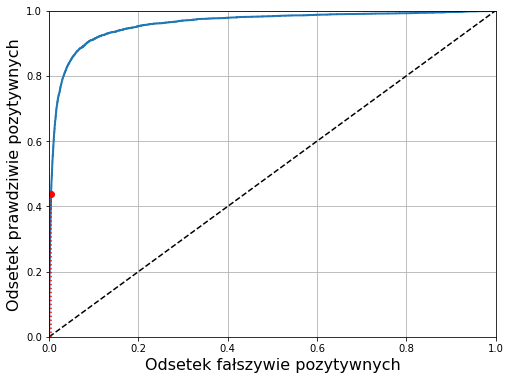

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # przerywana linia uko≈õna
    plt.axis([0, 1, 0, 1])                                       
    plt.xlabel('Odsetek fa≈Çszywie pozytywnych', fontsize=16)     
    plt.ylabel('Odsetek prawdziwie pozytywnych', fontsize=16)    
    plt.grid(True)                                               

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
plt.show()

**Rysunek 3.5.** *Wykres krzywej ROC*

Jednym ze sposob√≥w por√≥wnywania klasyfikator√≥w jest pomiar ich **obszaru pod krzywƒÖ** (ang. *area under the curve* ‚Äî AUC). Obszar AUC w przypadku doskona≈Çego klasyfikatora by≈Çby r√≥wny 1, nato- miast w ca≈Çkowicie losowym klasyfikatorze ma on warto≈õƒá 0,5. Modu≈Ç Scikit-Learn zawiera funkcjƒô s≈Çu≈ºƒÖcƒÖ do wyliczania obszaru AUC na wykresie ROC:

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [40]:
y_scores_forest = y_probas_forest[:, 1] # wynik = prawdopodobie≈Ñstwo przynale≈ºno≈õci do klasy pozytywnej
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

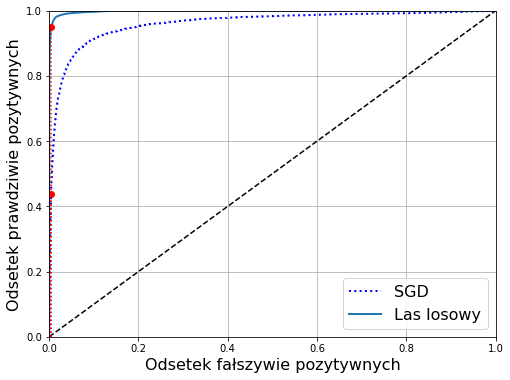

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Las losowy")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

**Rysunek 3.7.** *Por√≥wnanie krzywych ROC: klasyfikator lasu losowego jest lepszy od klasyfikatora SGD, poniewa≈º jego krzywa ROC znajduje siƒô znacznie bli≈ºej g√≥rnego lewego rogu, a jego obszar AUC jest tak≈ºe korzystniejszy*

In [42]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

Spr√≥buj zmierzyƒá r√≥wnie≈º warto≈õci precyzji i pe≈Çno≈õci: powinna≈õ/powiniene≈õ uzyskaƒá wyniki rzƒôdu, odpowiednio, 99% i 86.6% (lub wy≈ºej).

### Warto≈õƒá prezycji

In [43]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=5)
precision_score(y_train_5, y_train_pred_forest)

0.9910004185851821

### Warto≈õƒá pe≈Çno≈õci

In [44]:
roc_auc_score(y_train_5, y_train_pred_forest)

0.9363336166409291

***

## Klasyfikacja wieloklasowa

Klasyfikatory binarne s≈Çu≈ºƒÖ do rozpoznawania dw√≥ch klas, natomiast **klasyfikatory wieloklasowe** (zwane r√≥wnie≈º **klasyfikatorami wielomianowymi**) s≈Çu≈ºƒÖ do rozr√≥≈ºniania wiƒôkszej ich liczby.

Niekt√≥re algorytmy (takie jak klasyfikatory SGD, klasyfikatory losowego lasu lub naiwne klasyfikatory bayesowskie) sƒÖ w stanie natywnie zajmowaƒá siƒô wieloma klasami naraz. Inne (takie jak maszyny wektor√≥w no≈õnych czy klasyfikatory regresji logistycznej) majƒÖ charakter typowo binarny. Istnieje jednak wiele strategii, dziƒôki kt√≥rym mo≈ºemy przeprowadzaƒá klasyfikacjƒô wieloklasowƒÖ przy u≈ºyciu wielu klasyfikator√≥w binarnych.

Jeden ze sposob√≥w stworzenia systemu klasyfikujƒÖcego 10 klas obraz√≥w cyfr (od 0 do 9) polega na wyuczeniu 10 klasyfikator√≥w binarnych, po jednym na ka≈ºdƒÖ cyfrƒô (wykrywacz zer, jedynek, dw√≥jek itd.). Nastƒôpnie na etapie klasyfikacji obrazu uzyskujemy wynik z ka≈ºdego klasyfikatora dla danej cyfry i wybieramy klasƒô, kt√≥ra uzyska≈Ça najwy≈ºszy wynik. Jest to tzw. strategia **jeden przeciw reszcie** (ang. *one-versus-rest* ‚Äî OvR), znana r√≥wnie≈º jako **jeden przeciw wszystkim** (ang. *one-versus-all* ‚Äî OvA).

Jeszcze innym rozwiƒÖzaniem jest wyuczenie klasyfikatora binarnego dla ka≈ºdej pary cyfr: jeden rozpoznaje zera i jedynki, drugi ‚Äî zera i dw√≥jki, jeszcze inny ‚Äî jedynki i dw√≥jki itd. Jest to strategia **jeden przeciw jednemu** (ang. *one-versus-one* ‚Äî OvO). Je≈õli masz do czynienia z N klasami, musisz wytrenowaƒá N√ó(N‚Äì1):2  klasyfikator√≥w. W przypadku zestawu danych MNIST oznacza to wyuczenie 45 klasyfikator√≥w binarnych! Aby zaklasyfikowaƒá dany obraz, musieliby≈õmy przepu≈õciƒá go przez wszystkie 45 klasyfikator√≥w i sprawdziƒá, kt√≥ra klasa wygrywa wiƒôkszo≈õƒá ‚Äûpojedynk√≥w‚Äù. G≈Ç√≥wnƒÖ zaletƒÖ strategii OvO jest fakt, ≈ºe ka≈ºdy klasyfikator musi zostaƒá wytrenowany jedynie wobec czƒô≈õci zbioru uczƒÖcego sk≈ÇadajƒÖcego siƒô z obydwu por√≥wnywanych klas.

Pewne algorytmy (jak choƒáby maszyny wektor√≥w no≈õnych) nie skalujƒÖ siƒô zbyt dobrze do rozmiar√≥w zbioru uczƒÖcego. W ich przypadku preferowane jest stosowanie strategii OvO, poniewa≈º uczenie wielu klasyfikator√≥w wobec niewielkich zbior√≥w danych przebiega szybciej ni≈º trenowanie kilku klasyfikator√≥w wobec du≈ºych zbior√≥w przyk≈Çad√≥w. Jednak≈ºe w przypadku wiƒôkszo≈õci klasyfikator√≥w binarnych zalecane jest korzystanie ze strategii OvR.
Modu≈Ç Scikit-Learn wykrywa sytuacje, gdy pr√≥bujemy u≈ºywaƒá algorytmu klasyfikacji binarnej w procesie klasyfikacji wieloklasowej, i automatycznie przechodzi na strategiƒô OvR lub OvO, w zale≈ºno≈õci od algorytmu. Sprawd≈∫my to na klasyfikatorze maszyny wektor√≥w no≈õnych (zob. rozdzia≈Ç 5.), za pomocƒÖ klasy `sklearn.svm.SVC`:

In [45]:
from sklearn.svm import SVC
svm_clf = SVC(gamma='auto', random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

To by≈Ço proste! Powy≈ºszy fragment kodu wyucza klasyfikator SVC wobec zbioru uczƒÖcego za pomocƒÖ pierwotnych klas docelowych w zakresie od 0 do 9 `(y_train)`, zatem nie korzystamy tu z klas docelowych 5 przeciw reszcie `(y_train_5)`. Nastƒôpnie zostaje wyliczona prognoza (tym razem prawid≈Çowa). Zgodnie z tƒÖ strategiƒÖ modu≈Ç Scikit-Learn skorzysta≈Ç w rzeczywisto≈õci ze strategii OvO: wytrenowa≈Ç 45 klasyfikator√≥w binarnych, uzyska≈Ç wyniki decyzyjne dla analizowanego obrazu i wybra≈Ç klasƒô, kt√≥ra wygra≈Ça wiƒôkszo≈õƒá ‚Äûpojedynk√≥w‚Äù.

Je≈ºeli wywo≈Çasz metodƒô `decision_function()`, zauwa≈ºysz, ≈ºe zostaje zwr√≥cony nie jeden wynik na obraz, ale a≈º 10 wynik√≥w, po jednym na ka≈ºdƒÖ klasƒô:

In [46]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [47]:
np.argmax(some_digit_scores)

5

In [48]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [49]:
svm_clf.classes_[5]

5

üî¥üî¥ Klasyfikator po wytrenowaniu przechowuje listƒô klas docelowych we w≈Çasnym atrybucie `classes_`, w uporzƒÖdkowanym szeregu kolejno≈õci. W naszym przypadku indeks ka≈ºdej klasy w tablicy `classes_` dogodnie dla nas jest dopasowany do ka≈ºdej klasy (np. okazuje siƒô, ≈ºe klasa o indeksie 5 symbolizuje klasƒô piƒÖtek), zazwyczaj jednak nie powinni≈õmy liczyƒá na takie szczƒô≈õcie. üî¥üî¥

Je≈õli chcesz zmusiƒá modu≈Ç Scikit-Learn do stosowania strategii OvO lub OvR, mo≈ºesz skorzystaƒá z klas `OneVsOneClassifier` lub `OneVsRestClassifier`. Wystarczy stworzyƒá ich wystƒÖpienie i przekazaƒá konstruktorowi klasyfikator (nie musi byƒá on nawet binarny). Na przyk≈Çad poni≈ºszy kod stworzy klasyfikator wieloklasowy (na podstawie klasyfikatora `SVC`) przy u≈ºyciu strategii OvR:

In [50]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma='auto', random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [51]:
len(ovr_clf.estimators_)

10

R√≥wnie ≈Çatwe jest uczenie klasyfikatora `SGDClassifier` (lub `RandomForestClassifier`):

In [52]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

Tym razem nie zosta≈Çy wdro≈ºone strategie OvO ani OvR, poniewa≈º klasyfikatory SGD mogƒÖ bezpo≈õrednio klasyfikowaƒá przyk≈Çady w spos√≥b wieloklasowy. Metoda `decision_function()` zwraca teraz po jednej warto≈õci na ka≈ºdƒÖ klasƒô. Sp√≥jrzmy na wynik wyznaczony ka≈ºdej klasie przez klasyfikator SGD:

In [53]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

Jak widaƒá, klasyfikator wykazuje do≈õƒá du≈ºy stopie≈Ñ pewno≈õci w swoich przewidywaniach: niemal wszystkie wyniki majƒÖ du≈ºƒÖ warto≈õƒá ujemnƒÖ, podczas gdy klasa 5 uzyska≈Ça wynik 2412,5. Model wykazuje drobne wƒÖtpliwo≈õci w przypadku klasy 3, kt√≥rej wynik to 573,5. Teraz oczywi≈õcie chcemy oceniƒá skuteczno≈õƒá tych klasyfikator√≥w. Jak zwykle u≈ºyjemy w tym celu sprawdzianu krzy≈ºowego. Sprawd≈∫my dok≈Çadno≈õƒá klasyfikatora SGDClassifier za pomocƒÖ funkcji `cross_val_score()`:

In [54]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

Uzyskujemy wynik 84% wobec wszystkich podzbior√≥w testowych. Gdyby≈õmy korzystali z losowego klasyfikatora, otrzymaliby≈õmy wynik 10% dok≈Çadno≈õci, zatem nie jest ≈∫le, ale mog≈Çoby byƒá znacznie lepiej. Po zwyczajnym przeskalowaniu danych wej≈õciowych (zosta≈Ço to om√≥wione w rozdziale 2.) osiƒÖgnƒôliby≈õmy dok≈Çadno≈õƒá powy≈ºej 89%:

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

***
## Analiza B≈Çƒôd√≥w
Gdyby≈õmy mieli do czynienia z rzeczywistym projektem, przeprowadzaliby≈õmy teraz czynno≈õci wy- mienione w dodatku B. Sprawdzaliby≈õmy mo≈ºliwo≈õci przygotowywania danych, testowaliby≈õmy r√≥≈ºne modele, stworzyliby≈õmy kr√≥tkƒÖ listƒô najlepszych modeli i dostroiliby≈õmy ich hiperparametry za pomocƒÖ klasy GridSearchCV, a do tego pr√≥bowaliby≈õmy w jak najwiƒôkszym stopniu zautomatyzowaƒá ca≈Çy proces. Obecnie za≈Ço≈ºymy, ≈ºe znale≈∫li≈õmy obiecujƒÖcy model, i szukamy sposob√≥w, aby go jeszcze usprawniƒá. JednƒÖ z mo≈ºliwo≈õci jest analiza rodzaj√≥w b≈Çƒôd√≥w pope≈Çnianych przez ten model.


Po pierwsze, przyjrzyjmy siƒô macierzy pomy≈Çek. Podobnie jak robili≈õmy to wcze≈õniej, musimy wyliczyƒá prognozy za pomocƒÖ funkcji `cross_val_predict()`, a nastƒôpnie wywo≈Çaƒá funkcjƒô `confusion_matrix()`:

In [56]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

Ca≈Çkiem sporo tych liczb. Czƒôsto wygodniej jest spojrzeƒá na graficznƒÖ reprezentacjƒô macierzy pomy≈Çek za pomocƒÖ funkcji `matshow()`:

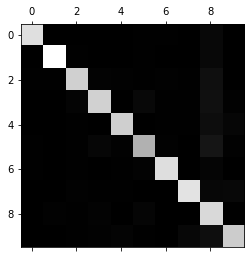

In [57]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Macierz ta wyglƒÖda ca≈Çkiem nie≈∫le, gdy≈º wiƒôkszo≈õƒá obraz√≥w znajduje siƒô na g≈Ç√≥wnej przekƒÖtnej, co oznacza, ≈ºe zosta≈Çy prawid≈Çowo sklasyfikowane. PiƒÖtki wyglƒÖdajƒÖ nieco ciemniej od pozosta≈Çych cyfr, co mo≈ºe oznaczaƒá, ≈ºe w zbiorze danych znajduje siƒô mniej obraz√≥w piƒÖtek lub ≈ºe klasyfikator nie sprawuje siƒô tak dobrze wobec piƒÖtek, jak w przypadku pozosta≈Çych cyfr. W rzeczywisto≈õci mo≈ºemy zweryfikowaƒá obydwa stwierdzenia.

Skoncentrujmy siƒô na narysowaniu wykresu b≈Çƒôd√≥w. Najpierw musimy podzieliƒá ka≈ºdƒÖ warto≈õƒá w macierzy pomy≈Çek przez liczbƒô obraz√≥w nale≈ºƒÖcych do danej klasy, dziƒôki czemu bƒôdziemy w stanie por√≥wnaƒá poziomy b≈Çƒôdu zamiast bezwzglƒôdnej liczby b≈Çƒôd√≥w (gdyby≈õmy przy niej pozostali, klasy zawierajƒÖce liczne przyk≈Çady wypada≈Çyby nazbyt niekorzystnie):

In [58]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Wype≈Çnijmy g≈Ç√≥wnƒÖ przekƒÖtnƒÖ zerami po to, aby pozosta≈Çy same b≈Çƒôdy, i znowu wy≈õwietlmy macierz pomy≈Çek w postaci graficznej:

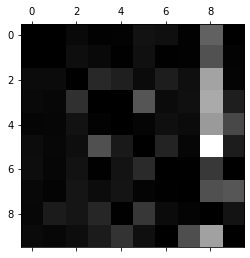

In [59]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Wyra≈∫nie widzimy rodzaje b≈Çƒôd√≥w pope≈Çnianych przez klasyfikator. Przypominam, ≈ºe rzƒôdy reprezentujƒÖ rzeczywiste klasy, kolumny za≈õ ‚Äî przewidywane klasy. Kolumna reprezentujƒÖca klasƒô 8 jest do≈õƒá jasna, co oznacza, ≈ºe wiele obraz√≥w zosta≈Ço nieprawid≈Çowo sklasyfikowanych jako ta w≈Ça≈õnie cyfra. Jednak rzƒÖd klasy 8 nie wyglƒÖda tak ≈∫le, co oznacza, ≈ºe zasadniczo wiƒôkszo≈õƒá √≥semek jest prawid≈Çowo klasyfikowanych. Jak widaƒá, macierz pomy≈Çek nie jest zbyt symetryczna. Mo≈ºemy r√≥wnie≈º dostrzec, ≈ºe tr√≥jki i piƒÖtki sƒÖ czƒôsto mylone (w obydwie strony).

Analiza macierzy pomy≈Çek czƒôsto dostarcza wskaz√≥wek pozwalajƒÖcych usprawniƒá klasyfikator. PatrzƒÖc na niƒÖ, mo≈ºemy stwierdziƒá, ≈ºe nale≈ºy popracowaƒá nad zmniejszeniem liczby fa≈Çszywych √≥semek. Mo≈ºesz na przyk≈Çad spr√≥bowaƒá zdobyƒá wiƒôcej obraz√≥w cyfr przypominajƒÖcych √≥semki (kt√≥re jednak nimi nie sƒÖ), dziƒôki czemu klasyfikator nauczy siƒô je odr√≥≈ºniaƒá od rzeczywistych √≥semek. Ewentualnie mogliby≈õmy spr√≥bowaƒá stworzyƒá nowe cechy pomagajƒÖce klasyfikatorowi ‚Äî przyk≈Çadowo, napisaƒá algorytm zliczajƒÖcy liczbƒô zamkniƒôtych pƒôtli na obrazie (np. cyfra 8 ma dwie pƒôtle, sz√≥stka ma jednƒÖ, a piƒÖtka ≈ºadnej). Jeszcze innym rozwiƒÖzaniem jest wstƒôpne przetwarzanie obraz√≥w (np. za pomocƒÖ modu≈Ç√≥w Scikit-Image, Pillow lub OpenCV) w taki spos√≥b, aby uwypukliƒá pewne wzorce, takie jak wspomniane ju≈º zamkniƒôte pƒôtle.

Dziƒôki analizowaniu poszczeg√≥lnych b≈Çƒôd√≥w mo≈ºemy dowiedzieƒá siƒô r√≥wnie≈º, jak w≈Ça≈õciwie dzia≈Ça nasz klasyfikator i jaka jest przyczyna pomy≈Çek, proces ten jest jednak bardziej skomplikowany i czasoch≈Çonny. Narysujmy, na przyk≈Çad, wykres przyk≈Çadowych tr√≥jek i piƒÖtek (funkcja `plot_digits()` wykorzystuje po prostu funkcjƒô `imshow()` modu≈Çu Matplotlib; szczeg√≥≈Çy znajdziesz w notatniku Jupyter do≈ÇƒÖczonym do tego rozdzia≈Çu):

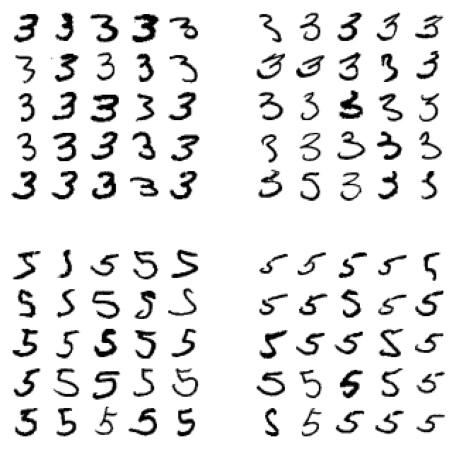

In [60]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

Dwa bloki o rozmiarze 5√ó5 widoczne po lewej stronie przedstawiajƒÖ cyfry sklasyfikowane jako tr√≥jki, natomiast po prawej stronie widzimy prognozowane piƒÖtki. Niekt√≥re nieprawid≈Çowo rozpoznane cyfry (np. w lewym dolnym i prawym g√≥rnym bloku) zosta≈Çy tak fatalnie zapisane, ≈ºe nawet cz≈Çowiek mia≈Çby problem z ich klasyfikacjƒÖ (np. piƒÖtka znajdujƒÖca siƒô na przeciƒôciu pierwszego rzƒôdu i drugiej kolumny wyglƒÖda jak wyjƒÖtkowo niechlujnie zapisana tr√≥jka). Jednak wiƒôkszo≈õƒá nieprawid≈Çowo sklasyfikowanych obraz√≥w to z perspektywy ludzkiego m√≥zgu wyra≈∫ne b≈Çƒôdy i ciƒô≈ºko nam zrozumieƒá, dlaczego klasyfikator pope≈Çni≈Ç takie gafy. Wynika to z faktu, ≈ºe skorzystali≈õmy z klasy SGDClassifier, kt√≥ra jest w istocie prostym modelem liniowym. Przydziela on jedynie wagi przynale≈ºno≈õci do klasy dla ka≈ºdego piksela, a w trakcie analizy nowej pr√≥bki po prostu sumuje wa≈ºone poziomy szaro≈õci pikseli, aby uzyskaƒá wynik dla ka≈ºdej klasy. Skoro wiƒôc tr√≥jki i piƒÖtki r√≥≈ºniƒÖ siƒô zaledwie kilkoma pikselami, klasyfikator mo≈ºe ≈Çatwo siƒô myliƒá w ich rozr√≥≈ºnianiu.

G≈Ç√≥wnƒÖ r√≥≈ºnicƒÖ pomiƒôdzy tr√≥jkami i piƒÖtkami jest po≈Ço≈ºenie ma≈Çej linii ≈ÇƒÖczƒÖcej g√≥rnƒÖ kreskƒô z dolnym ≈Çukiem. Je≈õli narysujemy cyfrƒô '3' z tym po≈ÇƒÖczeniem przesuniƒôtym nieznacznie w lewƒÖ stronƒô, klasyfikator mo≈ºe jƒÖ uznaƒá za '5', i odwrotnie. Innymi s≈Çowy, klasyfikator ten jest czu≈Çy na przesuniƒôcia i obroty. Z tego wynika, ≈ºe w celu u≈Çatwienia rozr√≥≈ºniania tr√≥jek od piƒÖtek nale≈ºa≈Çoby wstƒôpnie przetworzyƒá obrazy tak, aby zosta≈Çy wy≈õrodkowane i jak najmniej przechylone. Prawdopodobnie rozwiƒÖzanie to zmniejszy≈Çoby wystƒôpowanie r√≥wnie≈º innych b≈Çƒôd√≥w.

## Klasyfikacja wieloetykietowa
Do tej pory ka≈ºdy przyk≈Çad by≈Ç przydzielany wy≈ÇƒÖcznie do jednej klasy. W niekt√≥rych sytuacjach chcemy, aby klasyfikator wyznacza≈Ç wiele klas dla jednego wystƒÖpienia. We≈∫my pod uwagƒô klasyfikator rozpoznawania twarzy: co powinien zrobiƒá, je≈õli rozpozna kilka os√≥b na jednym zdjƒôciu? Powinien przydzieliƒá po jednej etykiecie na ka≈ºdƒÖ rozpoznanƒÖ osobƒô. Za≈Ç√≥≈ºmy, ≈ºe model taki zosta≈Ç wyuczony do rozpoznawania trzech os√≥b: Alicji, W≈Çadka i Karola. Po zaprezentowaniu zdjƒôƒá Alicji i Karola powinien zostaƒá wygenerowany wynik [1, 0, 1] (czyli ‚ÄûAlicja tak, W≈Çadek nie, Karol tak‚Äù). Tego typu system klasyfikujƒÖcy zdolny do wyznaczania wielu binarnych znacznik√≥w nosi nazwƒô systemu **klasyfikacji wieloetykietowej** (ang. *multilabel classification*).

Nie bƒôdziemy jeszcze zajmowaƒá siƒô zagadnieniem rozpoznawania twarzy, ale przyjrzyjmy siƒô prostszemu przyk≈Çadowi, wy≈ÇƒÖcznie w celach poglƒÖdowych:

In [61]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

Powy≈ºszy kod generuje tablicƒô `y_multilabel` zawierajƒÖcƒÖ dwie docelowe etykiety dla ka≈ºdego obrazu cyfry: pierwsza z nich okre≈õla, czy mamy do czynienia z cyfrƒÖ o du≈ºej warto≈õci (7, 8 i 9), natomiast druga m√≥wi nam, czy dana cyfra jest nieparzysta. Nastƒôpnie zostaje utworzone wystƒÖpienie klasyfikatora `KNeighborsClassifier` (obs≈Çuguje on klasyfikacjƒô wieloetykietowƒÖ, czego nie mo≈ºna powiedzieƒá o wszystkich klasyfikatorach), po czym uczymy go za pomocƒÖ tablicy zawierajƒÖcej wiele docelowych element√≥w. Teraz mo≈ºemy wyliczyƒá prognozy, w wyniku czego otrzymujemy dwie etykiety:

In [62]:
knn_clf.predict([some_digit])

array([[False,  True]])

Zgadza siƒô! Cyfra 5 rzeczywi≈õcie nie ma du≈ºej warto≈õci (`False`) i jest nieparzysta (`True`).
Istnieje wiele sposob√≥w oceniania wydajno≈õci klasyfikatora wieloetykietowego, a dob√≥r wska≈∫ni- ka zale≈ºy w rzeczywisto≈õci od natury projektu. JednƒÖ z metod jest obliczenie wyniku $F_{1}$ dla poszczeg√≥lnych etykiet (lub u≈ºycie dowolnej innej om√≥wionego wcze≈õniej wska≈∫nika klasyfikatora binarnego), a nastƒôpnie po prostu wyliczenie ≈õredniej. Poni≈ºszy kod wylicza u≈õredniony wynik $F_{1}$ dla wszystkich etykiet:

**Ostrze≈ºenie**: poni≈ºsza kom√≥rka mo≈ºe byƒá przetwarzana przez bardzo d≈Çugi czas (w zale≈ºno≈õci od sprzƒôtu mo≈ºe to zajƒÖƒá ca≈Çe godziny).

In [63]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

Zak≈Çadamy tu jednak, ≈ºe wszystkie etykiety majƒÖ takƒÖ samƒÖ wagƒô, co nie zawsze jest prawdƒÖ. Jest to istotne zw≈Çaszcza w sytuacji, gdyby≈õmy mieli znacznie wiƒôcej zdjƒôƒá Alicji ni≈º W≈Çadka lub Karola ‚Äî nale≈ºa≈Çoby wtedy wyznaczyƒá wiƒôkszƒÖ wagƒô dla wynik√≥w zdjƒôƒá Alicji. Prostym rozwiƒÖzaniem jest nada- nie ka≈ºdej etykiecie wagi r√≥wnej jej `wsp√≥≈Çczynnikowi `wsparcia (ang. `support`; np. liczbie pr√≥bek zawierajƒÖcych etykietƒô docelowƒÖ). W tym celu wystarczy w powy≈ºszym fragmencie kodu wstawiƒá wyra≈ºenie average="`weighted`".

***
## Klasyfikacja wielowyj≈õciowa

Ostatnim rodzajem zadania klasyfikacyjnego, jakie om√≥wimy, jest **klasyfikacja wielowyj≈õciowo-wieloklasowa** (ang. *multioutput-multiclass classification*), zwana r√≥wnie≈º **klasyfikacjƒÖ wielowyj≈õciowƒÖ** (ang. *multioutput classification*). Jest to po prostu uog√≥lnienie klasyfikacji wieloetykietowej, w kt√≥rym ka≈ºda etykieta mo≈ºe byƒá wieloklasowa (tj. mo≈ºe mieƒá ponad dwie mo≈ºliwe warto≈õci).
Aby to zilustrowaƒá, stw√≥rzmy system usuwajƒÖcy szumy z obraz√≥w cyfr. Danymi wej≈õciowymi bƒôdƒÖ zaszumione obrazy cyfr, na wyj≈õciu natomiast uzyskamy (takƒÖ mamy nadziejƒô) czysty obraz cyfry w postaci tablicy zawierajƒÖcej poziomy szaro≈õci poszczeg√≥lnych pikseli, zupe≈Çnie jak w przypadku zestawu danych MNIST. Zwr√≥ƒá uwagƒô, ≈ºe wynik klasyfikatora jest wieloetykietowy (na jeden piksel przypada jedna etykieta), a ka≈ºda z etykiet mo≈ºe mieƒá r√≥≈ºne warto≈õci (poziomy szaro≈õci piksela mieszczƒÖ siƒô w zakresie od 0 do 255). Jak zatem widaƒá, jest to doskona≈Çy przyk≈Çad systemu klasyfikacji wielowyj≈õciowej.

üîµüîµ Granica pomiƒôdzy klasyfikacjƒÖ a regresjƒÖ bywa czasami bardzo zamazana, tak jak w omawianym przypadku. Zapewne przewidywanie poziomu szaro≈õci pikseli bardziej przypomina regresjƒô ni≈º klasyfikacjƒô. Do tego systemy wielowyj≈õciowe nie ograniczajƒÖ siƒô wy≈ÇƒÖcznie do zada≈Ñ klasyfikacji; mo≈ºesz nawet stworzyƒá system, kt√≥rego rezultatami jest wiele etykiet na ka≈ºdy przyk≈Çad, w tym zar√≥wno etykiety klas, jak i etykiety warto≈õci. üîµüîµ

Zacznijmy od utworzenia zbior√≥w uczƒÖcych i testowych ‚Äî za pomocƒÖ funkcji `randint()` do≈ÇƒÖczymy zaszumienie do poziom√≥w szaro≈õci pikseli w obrazach zbioru danych MNIST. Obrazami docelowymi bƒôdƒÖ pierwotne pr√≥bki:

In [64]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Zobaczmy, jak wyglƒÖda przyk≈Çadowy obraz ze zbioru testowego (tak, zaglƒÖdamy do danych testowych, dlatego wskazany jest srogi mars na Twoim czole):

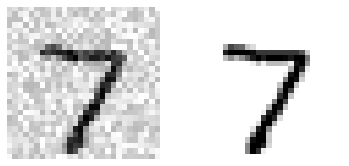

In [65]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

Po lewej stronie widzimy zaszumiony obraz wej≈õciowy, a po prawej ‚Äî czysty obraz docelowy. Wyuczmy teraz nasz klasyfikator i oczy≈õƒámy za jego pomocƒÖ obraz:

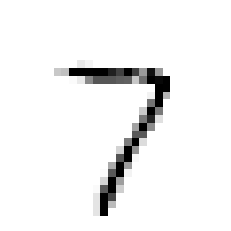

In [66]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

WyglƒÖda ca≈Çkiem podobnie do obrazu docelowego! Na tym zako≈Ñczymy naszƒÖ wycieczkƒô po krainie klasyfikacji. Umiesz ju≈º dobieraƒá odpowiednie wska≈∫niki do zada≈Ñ klasyfikacji, wyznaczaƒá optymalny kompromis pomiƒôdzy precyzjƒÖ a pe≈Çno≈õciƒÖ, por√≥wnywaƒá klasyfikatory, a tak≈ºe ‚Äî bardziej og√≥lnie ‚Äî tworzyƒá dobre systemy klasyfikujƒÖce dopasowane do r√≥≈ºnorodnych zada≈Ñ.

In [67]:
import pip

In [68]:
!pip list

Package                            Version
---------------------------------- ----------------------
absl-py                            0.10.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
appdirs                            1.4.4
applaunchservices                  0.2.1
appnope                            0.1.0
appscript                          1.1.1
argh                               0.26.2
asn1crypto                         1.3.0
astor                              0.8.1
astroid                            2.4.2
astropy                            4.0.1.post1
astunparse                         1.6.3
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-termin